# Banking: Credit Card Default

### Collecting a Datasets

#### Datset
- https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv
- https://www.kaggle.com/code/muskanbhasin/credit-card-default-prediction

#### Original Datasets
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
- https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

### Content
##### There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import os
dataset = "D:\\iNeuron\internship_projects\\Credit Card Default Prediction"
file_name = "UCI_Credit_Card.csv"
cwd = os.getcwd()

file_path = os.path.join(cwd,dataset,file_name)

In [2]:
# !pip install opendatasets
# !pip install seaborn

## importing Lib and packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
df1 = pd.read_csv(file_path)
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [25]:
train_df,test_df = train_test_split(df1,test_size=0.3,random_state=42)
preprocessing_obj = StandardScaler()
train_df.shape

(21000, 25)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rfc_clf = RandomForestRegressor()

In [35]:
input_feature_train_df = train_df.drop(columns=['default'], axis=1)
target_feature_train_df= train_df['default']
rfc_clf.fit(input_feature_train_df,target_feature_train_df)

RandomForestRegressor()

In [36]:
y_pred = rfc_clf.predict(input_feature_train_df)
r2_scores =r2_score(target_feature_train_df, y_pred)
r2_scores

0.8872864538015368

In [26]:

input_feature_train_arr = preprocessing_obj.fit_transform(input_feature_train_df)
input_feature_train_arr.shape

(21000, 24)

In [21]:
np.array(target_feature_train_df)
# target_feature_train_df

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [22]:
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
# test_arr = np.c_[input_feature_test_arr, np.array[target_feature_test_df]]

In [29]:
path_n = os.getcwd()
path_csv = "keshav.csv"
file_p = os.path.join(path_n, path_csv)

os.path.basename(file_p).replace(".csv",".npz")

'keshav.npz'

In [10]:
df1.rename(mapper={'default.payment.next.month':"default"},axis=1,inplace=True)

In [7]:
df1.shape

(30000, 25)

In [21]:
file= "UCI_Credit_Card.csv"
source_path = os.path.join("D:\PycharmProjects\DS_ML_Self\MLops_classifcation\notebooks")
source_file = os.path.join(source_path,file)

a = "D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks\\UCI_Credit_Card.csv"

excel = "UCI_Credit_Card.csv"
dfz = pd.read_csv(a)
target_path =os.path.join("D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\banking\\artifact\\data_ingestion\\2022-07-19-15-57-57\\tgz_data")
# ""D:\PycharmProjects\DS_ML_Self\MLops_classifcation\banking\artifact\data_ingestion\2022-07-19-15-57-57\tgz_data""

target_file = os.path.join(target_path,file)
dfz.to_csv("D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\banking\\artifact\\data_ingestion\\2022-07-19-15-57-57\\tgz_data\\test_daata.csv")

# shutils for copying file form source to destination

In [10]:
import shutil
shutil.copy()

In [27]:
src = "D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks\\UCI_Credit_Card.csv.zip"
src_z = os.path.join(src)

tg = "D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\banking\\artifact\\data_ingestion\\2022-07-19-15-57-57\\tgz_data"
tg_z = os.path.join(tg)
shutil.copy(src_z, tg_z)

'D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\banking\\artifact\\data_ingestion\\2022-07-19-15-57-57\\tgz_data\\UCI_Credit_Card.csv.zip'

In [6]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [8]:
AMOUNT_BILL = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',]
AMOUTN_PRE_PAY = [ 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6',]
REPAYMENT_STATUS = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [9]:
# df1['avg_amount_bill'] =df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1[BILL_AMT6']
                                                                                                                 
df1['avg_amount_bill'] = round((df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6,4)                        
df1['total_amount_bill'] = round((df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6']),4)  

In [10]:
'avg_amount_pay'
'total_amount_pay'
df1['avg_amount_pay'] = round((df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6'])/6,4)

df1['total_amount_pay'] = round((df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6']),4)  

In [11]:
df1['repayment_status'] = round((df1['PAY_0']+df1['PAY_2']+df1['PAY_3']+df1['PAY_4']+df1['PAY_5']+df1['PAY_6']),4)

In [12]:
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_amount_bill,total_amount_bill,avg_amount_pay,total_amount_pay,repayment_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,1284.0000,7704.0,114.8333,689.0,-2
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,2846.1667,17077.0,833.3333,5000.0,3
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,16942.1667,101653.0,1836.3333,11018.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,38555.6667,231334.0,1398.0000,8388.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,18223.1667,109339.0,9841.5000,59049.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,5003.0,3047.0,5000.0,1000.0,0,120891.5000,725349.0,7091.6667,42550.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8998.0,129.0,0.0,0.0,0,3530.3333,21182.0,2415.0000,14490.0,-4
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,22000.0,4200.0,2000.0,3100.0,1,11749.3333,70496.0,5216.6667,31300.0,8
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1178.0,1926.0,52964.0,1804.0,1,44435.1667,266611.0,24530.1667,147181.0,-1


In [14]:
plt.figure(figsize=(12,6))
# sns.countplot(x='avg_amount_bill',hue='default',data=df1)
plt.show()

<Figure size 864x432 with 0 Axes>

<BarContainer object of 30000 artists>

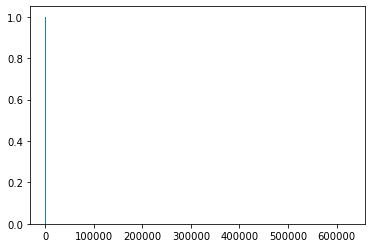

In [22]:
# plt.plot('avg_amount_bill','default',data=df1,kind='bar')
plt.bar(x='avg_amount_pay',height='default',data=df1)

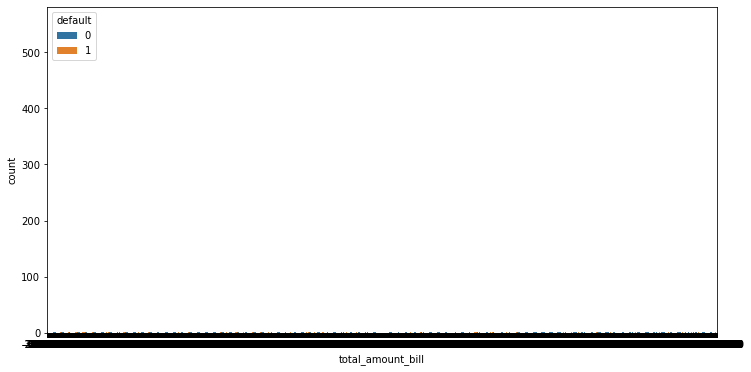

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='total_amount_bill',hue='default',data=df1)
plt.show()

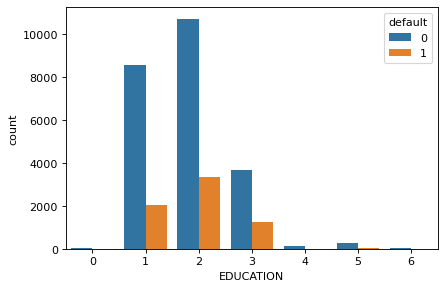

In [24]:
plt.figure(dpi=80)
sns.countplot(x="EDUCATION",hue="default", data=df1)
plt.show()

In [27]:
plt.figure(figsize=(12,6))
# sns.countplot(x='default',hue='avg_amount_pay',data=df1)
plt.show()

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="total_amount_pay",hue='default',data=df1)
plt.show()

In [ ]:
# "total_amount_bill" "avg_amount_pay" "total_amount_pay"

In [190]:
import opendatasets as od
import os
dataset_url ="https://www.kaggle.com/code/muskanbhasin/credit-card-default-prediction"
jsno_file = "D:\iNeuron\internship_projects"
# js = os.path.join(jsno_file,"kaggle.json")
params = {"username":"keshavumaretiya","key":"f9f56ba3bdbe907028e7e6698ea3decb"}
dfx = pd.read_csv("housing.csv")
dfx.head(1)
dfx['median_income'].value_counts()
dfx.shape
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5


In [221]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

dfx = pd.read_csv("housing.csv")

dfx["income_cat"] = pd.cut(
    dfx["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1,2,3,4,5]
)
dfx.shape

X = dfx.drop("median_house_value", axis=1)
y = dfx['median_house_value']
# train_test_split(X,y, test_size=0.3, random_state=42)
dfx.iloc[:,-1]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [219]:
# sss =StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X.loc[train_index], X.loc[test_index]
#     y_train, y_test = y.loc[train_index], y.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [203]:
# for i,j in split.split(X,y):
#     print(X.iloc[i].drop(y,axis=1).shape)
#     print(X.iloc[j].drop(y,axis=1).shape)
X_train,X_test,y_train,y_test = split.split(X,y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [201]:
# for train,test in split.split(dfx,dfx['median_income']):
#     tr = dfx.loc[train].drop(['median_income'], axis=1)
#     ts = dfx.loc[test].drop(['median_income'], axis=1)
# print(tr.shape,ts.shape)

In [40]:
# !pip install opendatasets
# !pip install kaggle


'D:\\iNeuron\\internship_projects\\Credit Card Default Prediction'

In [167]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'default-of-credit-card-clients-dataset',
 'housing.csv',
 'notebooks.ipynb',
 'practice.ipynb',
 'Project Credit-default prediction 01.ipynb',
 'testing',
 'train',
 'training.1600000.processed.noemoticon.csv.zip',
 'UCI_Credit_Card.csv',
 'Untitled.ipynb',
 'xgb_banking.pkl',
 'xgb_new.pkl']

## Downloading data from kaggle

In [44]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
api = KaggleApi()
api.authenticate()

link = "https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv"
os.getcwd()

path1 = os.path.join(os.getcwd(),"D:\iNeuron\internship_projects\Credit Card Default Prediction")

api.dataset_download_file(
    dataset='uciml/default-of-credit-card-clients-dataset',
    file_name ='UCI_Credit_Card.csv',
    path=path1)

True

## unzipping a file

In [47]:
import zipfile
file_zip ="UCI_Credit_Card.csv.zip"
download_zip_path = os.path.join(path1,file_zip)
print(download_zip_path)

target_path = os.path.join("D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks")
print(target_path)
with zipfile.ZipFile(download_zip_path, 'r') as zipref:
    zipref.extractall(target_path)

D:\iNeuron\internship_projects\Credit Card Default Prediction\UCI_Credit_Card.csv.zip
D:\PycharmProjects\DS_ML_Self\MLops_classifcation\notebooks


## TrainTest split

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd, numpy as np
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [13]:
y = df['median_house_value']
X = df.drop(labels='median_house_value',axis=1)
y.shape,X.shape,df.shape
df.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat']

In [2]:
df=pd.read_csv('housing.csv')
df["income_cat"] = pd.cut(df['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6.0,np.inf],labels=[1,2,3,4,5])

In [76]:
for train_index,test_index in split.split(df, df["income_cat"]):
            strat_train_set = df.loc[train_index].drop(["income_cat"],axis=1)
            strat_test_set = df.loc[test_index].drop(["income_cat"],axis=1)

In [86]:
strat_train_set.shape, strat_test_set.shape
strat_test_set.columns
split.split(df, df["income_cat"])
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

In [103]:
# test_dir = os.makedirs(target_path, exist_ok=True)
test_file_dir = "test"
test_dirs_path = os.path.join(target_path,test_file_dir)

os.makedirs(test_dirs_path,exist_ok = True)
test_dirs_path

'D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks\\test'

## creating dir and saving test.csv and train.csv file

In [126]:
# file_path()
"D:\PycharmProjects\DS_ML_Self\MLops_classifcation\notebooks\testing"
path = os.path.join("D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks\\testing")
file_name = "test.csv"
name_path = os.path.join(path,file_name)
strat_test_set.to_csv(name_path,index=False)


In [127]:
train_file_dir = "train"
file_name_train = "train.csv"
train_dirs_path = os.path.join(target_path,train_file_dir)
os.makedirs(train_dirs_path, exist_ok = True)

file_path_train_csv = os.path.join(train_dirs_path,file_name_train)
strat_train_set.to_csv(file_path_train_csv,index=False)

In [26]:
os.getcwd()

'D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks'

## coding for classification

In [45]:
# ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
# CONFIG_PATH = os.path.join(ROOT_DIR, 'configuration.conf')
os.getcwd()

'D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks'

# Downloading kaggle dataset with authentication

In [70]:
import json 
import os
from pathlib import Path

# your api key
api_key = {"username":"keshavumaretiya","key":"f9f56ba3bdbe907028e7e6698ea3decb"}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object 
# with open (kaggle_path/'kaggle.json', 'w') as handl:
#     json.dump(api_key,handl)

# os.chmod(kaggle_path/'kaggle.json', 600)  
__file__ = 'kaggle.json'
config = "kaggle.json"
ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
CONFIG_PATH = os.path.join(ROOT_DIR, config)
with open(CONFIG_PATH,'w') as kk:
    json.dump(api_key,kk)
print(CONFIG_PATH)

D:\PycharmProjects\DS_ML_Self\MLops_classifcation\notebooks\kaggle.json


In [61]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import zipfile
# os.environ["KAGGLE_CONFIG_DIR"] = os.getcwd()
# export KAGGLE_USERNAME=datadinosaur
# export KAGGLE_KEY=xxxxxxxxxxxxxx
# {"username":"keshavumaretiya","key":"f9f56ba3bdbe907028e7e6698ea3decb"}

api = KaggleApi()
api.authenticate()
download_url = "https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv"
dataset = "uciml/default-of-credit-card-clients-dataset"
file_name = "UCI_Credit_Card.csv"

ROOT_DIR = os.getcwd()
dataset_dir = "raw_data"
dataset_path = os.path.join(ROOT_DIR,dataset_dir)
os.makedirs(dataset_path,exist_ok = True)

uci_zip_data = "zip_data"
zip_data_dir =os.path.join(ROOT_DIR,uci_zip_data)
os.makedirs(zip_data_dir,exist_ok = True)

download_url = "https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv"
dataset = "uciml/default-of-credit-card-clients-dataset"
file_name = "UCI_Credit_Card.csv"

def download_bankig_data():

    uci_zip_data = "zip_data"
    zip_data_dir =os.path.join(ROOT_DIR,uci_zip_data)
    os.makedirs(zip_data_dir,exist_ok = True)
    
    api.dataset_download_file(
        dataset='uciml/default-of-credit-card-clients-dataset',
        file_name ='UCI_Credit_Card.csv',
        path=zip_data_dir)
    
    zipped_file_name = "UCI_Credit_Card.csv.zip"
    zip_file_path = os.path.join(zip_data_dir,zipped_file_name)
    return zip_file_path

        
def exctracted_tgz_file(zip_file_path):
    raw_data_dir = dataset_path
    os.makedirs(raw_data_dir, exist_ok=True)
    
    with zipfile.ZipFile(zip_file_path, 'r') as zipref:
        zipref.extractall(raw_data_dir)

            

In [57]:
# print(download_bankig_data())
print(dataset_path)

D:\PycharmProjects\DS_ML_Self\MLops_classifcation\notebooks\raw_data


In [62]:
zip_files = download_bankig_data()
exctracted_tgz_file(zip_files)

## learnings only

In [129]:
report_file_path = train_dirs_path
os.path.dirname(report_file_path)

'D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks'

In [150]:
from threading import Thread
import uuid
str(uuid.uuid4())

'13a5565b-9033-444c-a148-e7d3e4f5960f'

In [163]:
from collections import namedtuple
Experiment = namedtuple("Experiment", ["experiment_id", "initialization_timestamp", "artifact_time_stamp",
                                       "running_status", "start_time", "stop_time", "execution_time", "message",
                                       "experiment_file_path", "accuracy", "is_model_accepted"])
Experiment(* ([None] * 11))

Experiment(experiment_id=None, initialization_timestamp=None, artifact_time_stamp=None, running_status=None, start_time=None, stop_time=None, execution_time=None, message=None, experiment_file_path=None, accuracy=None, is_model_accepted=None)

# coding strategy :- 
## 1. Data ingestion only

In [ ]:
# yaml file -->dir: config

training_pipeline_config:
  pipeline_name: housing
  artifact_dir: artifact


data_ingestion_config:
  dataset_download_url: https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz
  raw_data_dir: raw_data
  tgz_download_dir: tgz_data
  ingested_dir: ingested_data
  ingested_train_dir: train
  ingested_test_dir: test 
    


In [30]:
ROOT_DIR = os.getcwd()
CONFIG_DIR = 'config'
CONFIG_FILE_NAME = 'config.yaml'
CONFIG_FILE_PATH= os.path.join(ROOT_DIR,CONFIG_DIR,CONFIG_FILE_NAME)
CONFIG_FILE_PATH

'D:\\PycharmProjects\\DS_ML_Self\\MLops_classifcation\\notebooks\\config\\config.yaml'

In [ ]:
# constant:dir : Constant file -->dir: housing
import os
from datetime import datetime

def get_current_time_stamp():
    return f"{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"
  
ROOT_DIR = os.getcwd()  #to get current working directory
CONFIG_DIR = "config"
CONFIG_FILE_NAME = "config.yaml"
CONFIG_FILE_PATH = os.path.join(ROOT_DIR,CONFIG_DIR,CONFIG_FILE_NAME)

CURRENT_TIME_STAMP = get_current_time_stamp()

# Training pipeline related variable
TRAINING_PIPELINE_CONFIG_KEY = "training_pipeline_config"
TRAINING_PIPELINE_ARTIFACT_DIR_KEY = "artifact_dir"
TRAINING_PIPELINE_NAME_KEY = "pipeline_name"

DATA_INGESTION_ARTIFACT_DIR = "data_ingestion"
DATA_INGESTION_CONFIG_KEY = "data_ingestion_config"
DATA_INGESTION_DOWNLOAD_URL_KEY = "dataset_download_url"
DATA_INGESTION_RAW_DATA_DIR_KEY = "raw_data_dir"
DATA_INGESTION_TGZ_DOWNLOAD_DIR_KEY = "tgz_download_dir"
DATA_INGESTION_INGESTED_DIR_NAME_KEY = "ingested_dir"
DATA_INGESTION_TRAIN_DIR_KEY = "ingested_train_dir"
DATA_INGESTION_TEST_DIR_KEY = "ingested_test_dir"

In [ ]:
# artifact_entity.py file  -->housing/entity dir
import namedtuple

DataIngestionArtifact = namedtuple("DataIngestionArtifact",
[ "train_file_path", "test_file_path", "is_ingested", "message"])

# config_entity.py file  -->housing/entity dir
DataIngestionConfig=namedtuple("DataIngestionConfig",
["dataset_download_url","tgz_download_dir","raw_data_dir","ingested_train_dir","ingested_test_dir"])


# config_entity.py file  -->housing/entity dir
TrainingPipelineConfig = namedtuple("TrainingPipelineConfig", ["artifact_dir"])


In [ ]:
# util.py file  -->housing/util dir
import yaml,os

def read_yaml_file(file_path:str)->dict:
    """
    Reads a YAML file and returns the contents as a dictionary.
    file_path: str
    """
    try:
        with open(file_path, 'rb') as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise HousingException(e,sys) from e

In [ ]:
# configuration :file  --> housing/config dir
from housing.entity.config_entity import DataIngestionConfig, DataTransformationConfig,DataValidationConfig,   \
ModelTrainerConfig,ModelEvaluationConfig,ModelPusherConfig,TrainingPipelineConfig
from housing.util.util import read_yaml_file
from housing.logger import logging
import sys,os
from housing.constant import *
from housing.exception import HousingException


class Configuartion:

    def __init__(self,
        config_file_path:str =CONFIG_FILE_PATH,
        current_time_stamp:str = CURRENT_TIME_STAMP
        ) -> None:
        try:
            self.config_info  = read_yaml_file(file_path=config_file_path)
            self.training_pipeline_config = self.get_training_pipeline_config()
            self.time_stamp = current_time_stamp
        except Exception as e:
            raise HousingException(e,sys) from e


    def get_data_ingestion_config(self) ->DataIngestionConfig:
        try:
            artifact_dir = self.training_pipeline_config.artifact_dir
            data_ingestion_artifact_dir=os.path.join(
                artifact_dir,
                DATA_INGESTION_ARTIFACT_DIR,
                self.time_stamp
            )
            data_ingestion_info = self.config_info[DATA_INGESTION_CONFIG_KEY]
            
            dataset_download_url = data_ingestion_info[DATA_INGESTION_DOWNLOAD_URL_KEY]
            tgz_download_dir = os.path.join(
                data_ingestion_artifact_dir,
                data_ingestion_info[DATA_INGESTION_TGZ_DOWNLOAD_DIR_KEY]
            )
            raw_data_dir = os.path.join(data_ingestion_artifact_dir,
            data_ingestion_info[DATA_INGESTION_RAW_DATA_DIR_KEY]
            )

            ingested_data_dir = os.path.join(
                data_ingestion_artifact_dir,
                data_ingestion_info[DATA_INGESTION_INGESTED_DIR_NAME_KEY]
            )
            ingested_train_dir = os.path.join(
                ingested_data_dir,
                data_ingestion_info[DATA_INGESTION_TRAIN_DIR_KEY]
            )
            ingested_test_dir =os.path.join(
                ingested_data_dir,
                data_ingestion_info[DATA_INGESTION_TEST_DIR_KEY]
            )


            data_ingestion_config=DataIngestionConfig(
                dataset_download_url=dataset_download_url, 
                tgz_download_dir=tgz_download_dir, 
                raw_data_dir=raw_data_dir, 
                ingested_train_dir=ingested_train_dir, 
                ingested_test_dir=ingested_test_dir
            )
            logging.info(f"Data Ingestion config: {data_ingestion_config}")
            return data_ingestion_config
        except Exception as e:
            raise HousingException(e,sys) from e
            
    #### -------###
    
    def get_training_pipeline_config(self) ->TrainingPipelineConfig:
        try:
            training_pipeline_config = self.config_info[TRAINING_PIPELINE_CONFIG_KEY]
            artifact_dir = os.path.join(ROOT_DIR,
            training_pipeline_config[TRAINING_PIPELINE_NAME_KEY],
            training_pipeline_config[TRAINING_PIPELINE_ARTIFACT_DIR_KEY]
            )

            training_pipeline_config = TrainingPipelineConfig(artifact_dir=artifact_dir)
            logging.info(f"Training pipleine config: {training_pipeline_config}")
            return training_pipeline_config
        except Exception as e:
            raise HousingException(e,sys) from e

In [ ]:
# data_ingestion.py -->housing/component dir

from housing.entity.config_entity import DataIngestionConfig
from housing.entity.artifact_entity import DataIngestionArtifact
import sys,os
from housing.exception import HousingException
from housing.logger import logging
import tarfile
import numpy as np
from six.moves import urllib
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

class DataIngestion:

    def __init__(self,data_ingestion_config:DataIngestionConfig ):
        try:
            logging.info(f"{'>>'*20}Data Ingestion log started.{'<<'*20} ")
            self.data_ingestion_config = data_ingestion_config

        except Exception as e:
            raise HousingException(e,sys)
    

    def download_housing_data(self,) -> str:
        try:
            #extraction remote url to download dataset
            download_url = self.data_ingestion_config.dataset_download_url

            #folder location to download file
            tgz_download_dir = self.data_ingestion_config.tgz_download_dir
            
            os.makedirs(tgz_download_dir,exist_ok=True)

            housing_file_name = os.path.basename(download_url)

            tgz_file_path = os.path.join(tgz_download_dir, housing_file_name)

            logging.info(f"Downloading file from :[{download_url}] into :[{tgz_file_path}]")
            urllib.request.urlretrieve(download_url, tgz_file_path)
            logging.info(f"File :[{tgz_file_path}] has been downloaded successfully.")
            return tgz_file_path

        except Exception as e:
            raise HousingException(e,sys) from e

    def extract_tgz_file(self,tgz_file_path:str):
        try:
            raw_data_dir = self.data_ingestion_config.raw_data_dir

            if os.path.exists(raw_data_dir):
                os.remove(raw_data_dir)

            os.makedirs(raw_data_dir,exist_ok=True)

            logging.info(f"Extracting tgz file: [{tgz_file_path}] into dir: [{raw_data_dir}]")
            with tarfile.open(tgz_file_path) as housing_tgz_file_obj:
                housing_tgz_file_obj.extractall(path=raw_data_dir)
            logging.info(f"Extraction completed")

        except Exception as e:
            raise HousingException(e,sys) from e
    
    def split_data_as_train_test(self) -> DataIngestionArtifact:
        try:
            raw_data_dir = self.data_ingestion_config.raw_data_dir

            file_name = os.listdir(raw_data_dir)[0]

            housing_file_path = os.path.join(raw_data_dir,file_name)


            logging.info(f"Reading csv file: [{housing_file_path}]")
            housing_data_frame = pd.read_csv(housing_file_path)

            housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )
            

            logging.info(f"Splitting data into train and test")
            strat_train_set = None
            strat_test_set = None

            split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

            for train_index,test_index in split.split(housing_data_frame, housing_data_frame["income_cat"]):
                strat_train_set = housing_data_frame.loc[train_index].drop(["income_cat"],axis=1)
                strat_test_set = housing_data_frame.loc[test_index].drop(["income_cat"],axis=1)

            train_file_path = os.path.join(self.data_ingestion_config.ingested_train_dir,
                                            file_name)

            test_file_path = os.path.join(self.data_ingestion_config.ingested_test_dir,
                                        file_name)
            
            if strat_train_set is not None:
                os.makedirs(self.data_ingestion_config.ingested_train_dir,exist_ok=True)
                logging.info(f"Exporting training datset to file: [{train_file_path}]")
                strat_train_set.to_csv(train_file_path,index=False)

            if strat_test_set is not None:
                os.makedirs(self.data_ingestion_config.ingested_test_dir, exist_ok= True)
                logging.info(f"Exporting test dataset to file: [{test_file_path}]")
                strat_test_set.to_csv(test_file_path,index=False)
            

            data_ingestion_artifact = DataIngestionArtifact(train_file_path=train_file_path,
                                test_file_path=test_file_path,
                                is_ingested=True,
                                message=f"Data ingestion completed successfully."
                                )
            logging.info(f"Data Ingestion artifact:[{data_ingestion_artifact}]")
            return data_ingestion_artifact

        except Exception as e:
            raise HousingException(e,sys) from e

    def initiate_data_ingestion(self)-> DataIngestionArtifact:
        try:
            tgz_file_path =  self.download_housing_data()
            self.extract_tgz_file(tgz_file_path=tgz_file_path)
            return self.split_data_as_train_test()
        except Exception as e:
            raise HousingException(e,sys) from e
    


    def __del__(self):
        logging.info(f"{'>>'*20}Data Ingestion log completed.{'<<'*20} \n\n")


In [ ]:
# pipeline.py file --->housing/pipline dir

class Pipeline(Thread):
    experiment: Experiment = Experiment(*([None] * 11))
    experiment_file_path = None

    def __init__(self, config: Configuartion ) -> None:
        try:
            os.makedirs(config.training_pipeline_config.artifact_dir, exist_ok=True)
            Pipeline.experiment_file_path=os.path.join(config.training_pipeline_config.artifact_dir,EXPERIMENT_DIR_NAME, EXPERIMENT_FILE_NAME)
            super().__init__(daemon=False, name="pipeline")
            self.config = config
        except Exception as e:
            raise HousingException(e, sys) from e

    def start_data_ingestion(self) -> DataIngestionArtifact:
        try:
            data_ingestion = DataIngestion(data_ingestion_config=self.config.get_data_ingestion_config())
            return data_ingestion.initiate_data_ingestion()
        except Exception as e:
            raise HousingException(e, sys) from e

## 2. DataValidation only

In [ ]:
# config.yaml file 

data_validation_config:
  schema_dir: config
  schema_file_name: schema.yaml
  report_file_name: report.json
  report_page_file_name: report.html

In [ ]:
# constant dir

# Data Validation related variables
DATA_VALIDATION_CONFIG_KEY = "data_validation_config"
DATA_VALIDATION_SCHEMA_FILE_NAME_KEY = "schema_file_name"
DATA_VALIDATION_SCHEMA_DIR_KEY = "schema_dir"
DATA_VALIDATION_ARTIFACT_DIR_NAME="data_validation"
DATA_VALIDATION_REPORT_FILE_NAME_KEY = "report_file_name"
DATA_VALIDATION_REPORT_PAGE_FILE_NAME_KEY = "report_page_file_name"


In [29]:
# artifact_enitity.file --banking/entity dir
from collections import namedtuple
DataValidationArtifact = namedtuple("DataValidationArtifact",["schema_file_path","report_file_path","report_page_file_path","is_validated","message"])

# config_enitity.file --banking/entity dir
DataValidationConfig = namedtuple("DataValidationConfig", ["schema_file_path","report_file_path","report_page_file_path"])


In [ ]:
# configuration.py file --> bankig/config dir

    def get_data_validation_config(self) -> DataValidationConfig:
        try:
            artifact_dir = self.training_pipeline_config.artifact_dir

            data_validation_artifact_dir=os.path.join(
                artifact_dir,
                DATA_VALIDATION_ARTIFACT_DIR_NAME,
                self.time_stamp
            )
            data_validation_config = self.config_info[DATA_VALIDATION_CONFIG_KEY]


            schema_file_path = os.path.join(ROOT_DIR,
            data_validation_config[DATA_VALIDATION_SCHEMA_DIR_KEY],
            data_validation_config[DATA_VALIDATION_SCHEMA_FILE_NAME_KEY]
            )

            report_file_path = os.path.join(data_validation_artifact_dir,
            data_validation_config[DATA_VALIDATION_REPORT_FILE_NAME_KEY]
            )

            report_page_file_path = os.path.join(data_validation_artifact_dir,
            data_validation_config[DATA_VALIDATION_REPORT_PAGE_FILE_NAME_KEY]

            )

            data_validation_config = DataValidationConfig(
                schema_file_path=schema_file_path,
                report_file_path=report_file_path,
                report_page_file_path=report_page_file_path,
            )
            return data_validation_config
        except Exception as e:
            raise HousingException(e,sys) from e


In [ ]:
# data_validation.py file --> banking/component dir


from housing.logger import logging
from housing.exception import HousingException
from housing.entity.config_entity import DataValidationConfig
from housing.entity.artifact_entity import DataIngestionArtifact,DataValidationArtifact
import os,sys
import pandas  as pd
from evidently.model_profile import Profile
from evidently.model_profile.sections import DataDriftProfileSection
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab
import json

class DataValidation:
    

    def __init__(self, data_validation_config:DataValidationConfig,
        data_ingestion_artifact:DataIngestionArtifact):
        try:
            logging.info(f"{'>>'*30}Data Valdaition log started.{'<<'*30} \n\n")
            self.data_validation_config = data_validation_config
            self.data_ingestion_artifact = data_ingestion_artifact
        except Exception as e:
            raise HousingException(e,sys) from e


    def get_train_and_test_df(self):
        try:
            train_df = pd.read_csv(self.data_ingestion_artifact.train_file_path)
            test_df = pd.read_csv(self.data_ingestion_artifact.test_file_path)
            return train_df,test_df
        except Exception as e:
            raise HousingException(e,sys) from e


    def is_train_test_file_exists(self)->bool:
        try:
            logging.info("Checking if training and test file is available")
            is_train_file_exist = False
            is_test_file_exist = False

            train_file_path = self.data_ingestion_artifact.train_file_path
            test_file_path = self.data_ingestion_artifact.test_file_path

            is_train_file_exist = os.path.exists(train_file_path)
            is_test_file_exist = os.path.exists(test_file_path)

            is_available =  is_train_file_exist and is_test_file_exist

            logging.info(f"Is train and test file exists?-> {is_available}")
            
            if not is_available:
                training_file = self.data_ingestion_artifact.train_file_path
                testing_file = self.data_ingestion_artifact.test_file_path
                message=f"Training file: {training_file} or Testing file: {testing_file}" \
                    "is not present"
                raise Exception(message)

            return is_available
        except Exception as e:
            raise HousingException(e,sys) from e

    
    def validate_dataset_schema(self)->bool:
        try:
            validation_status = False
            
            #Assigment validate training and testing dataset using schema file
            #1. Number of Column
            #2. Check the value of ocean proximity 
            # acceptable values     <1H OCEAN
            # INLAND
            # ISLAND
            # NEAR BAY
            # NEAR OCEAN
            #3. Check column names


            validation_status = True
            return validation_status 
        except Exception as e:
            raise HousingException(e,sys) from e

    def get_and_save_data_drift_report(self):
        try:
            profile = Profile(sections=[DataDriftProfileSection()])

            train_df,test_df = self.get_train_and_test_df()

            profile.calculate(train_df,test_df)

            report = json.loads(profile.json())

            report_file_path = self.data_validation_config.report_file_path
            report_dir = os.path.dirname(report_file_path)
            os.makedirs(report_dir,exist_ok=True)

            with open(report_file_path,"w") as report_file:
                json.dump(report, report_file, indent=6)
            return report
        except Exception as e:
            raise HousingException(e,sys) from e

    def save_data_drift_report_page(self):
        try:
            dashboard = Dashboard(tabs=[DataDriftTab()])
            train_df,test_df = self.get_train_and_test_df()
            dashboard.calculate(train_df,test_df)

            report_page_file_path = self.data_validation_config.report_page_file_path
            report_page_dir = os.path.dirname(report_page_file_path)
            os.makedirs(report_page_dir,exist_ok=True)

            dashboard.save(report_page_file_path)
        except Exception as e:
            raise HousingException(e,sys) from e

    def is_data_drift_found(self)->bool:
        try:
            report = self.get_and_save_data_drift_report()
            self.save_data_drift_report_page()
            return True
        except Exception as e:
            raise HousingException(e,sys) from e

    def initiate_data_validation(self)->DataValidationArtifact :
        try:
            self.is_train_test_file_exists()
            self.validate_dataset_schema()
            self.is_data_drift_found()

            data_validation_artifact = DataValidationArtifact(
                schema_file_path=self.data_validation_config.schema_file_path,
                report_file_path=self.data_validation_config.report_file_path,
                report_page_file_path=self.data_validation_config.report_page_file_path,
                is_validated=True,
                message="Data Validation performed successully."
            )
            logging.info(f"Data validation artifact: {data_validation_artifact}")
            return data_validation_artifact
        except Exception as e:
            raise HousingException(e,sys) from e


    def __del__(self):
        logging.info(f"{'>>'*30}Data Valdaition log completed.{'<<'*30} \n\n")
        

In [ ]:
# pipeline.py file --> banking/pipeline dir
from housing.component.data_validation import DataValidation
from housing.entity.artifact_entity import DataIngestionArtifact, DataValidationArtifact

def start_data_validation(self, data_ingestion_artifact: DataIngestionArtifact) \
        -> DataValidationArtifact:
    try:
        data_validation = DataValidation(data_validation_config=self.config.get_data_validation_config(),
                                         data_ingestion_artifact=data_ingestion_artifact
                                         )
        return data_validation.initiate_data_validation()
    except Exception as e:
        raise HousingException(e, sys) from e


## 3. DataTransformation only

In [ ]:
# config.yaml file

data_transformation_config:
  add_bedroom_per_room: true
  transformed_dir: transformed_data
  transformed_train_dir: train
  transformed_test_dir: test
  preprocessing_dir: preprocessed
  preprocessed_object_file_name: preprocessed.pkl

In [ ]:
# constant file

# Data Transformation related variables
DATA_TRANSFORMATION_ARTIFACT_DIR = "data_transformation"
DATA_TRANSFORMATION_CONFIG_KEY = "data_transformation_config"
DATA_TRANSFORMATION_ADD_BEDROOM_PER_ROOM_KEY = "add_bedroom_per_room"
DATA_TRANSFORMATION_DIR_NAME_KEY = "transformed_dir"
DATA_TRANSFORMATION_TRAIN_DIR_NAME_KEY = "transformed_train_dir"
DATA_TRANSFORMATION_TEST_DIR_NAME_KEY = "transformed_test_dir"
DATA_TRANSFORMATION_PREPROCESSING_DIR_KEY = "preprocessing_dir"
DATA_TRANSFORMATION_PREPROCESSED_FILE_NAME_KEY = "preprocessed_object_file_name"


COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"
DATASET_SCHEMA_COLUMNS_KEY=  "columns"

NUMERICAL_COLUMN_KEY="numerical_columns"
CATEGORICAL_COLUMN_KEY = "categorical_columns"

TARGET_COLUMN_KEY="target_column"

In [ ]:
# config_entity file from banking/enitity dir
DataTransformationConfig = namedtuple("DataTransformationConfig", ["add_bedroom_per_room",
                                                                   "transformed_train_dir",
                                                                   "transformed_test_dir",
                                                                   "preprocessed_object_file_path"])

# artifact_entity file from banking/enitity dir

DataTransformationArtifact = namedtuple("DataTransformationArtifact",
 ["is_transformed", "message", "transformed_train_file_path","transformed_test_file_path",
     "preprocessed_object_file_path"])



In [ ]:
# util.py file from banking/util dir 

import yaml
from housing.exception import HousingException
import os,sys
import numpy as np
import dill
import pandas as pd
from housing.constant import *


def write_yaml_file(file_path:str,data:dict=None):
    """
    Create yaml file 
    file_path: str
    data: dict
    """
    try:
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        with open(file_path,"w") as yaml_file:
            if data is not None:
                yaml.dump(data,yaml_file)
    except Exception as e:
        raise HousingException(e,sys)


def read_yaml_file(file_path:str)->dict:
    """
    Reads a YAML file and returns the contents as a dictionary.
    file_path: str
    """
    try:
        with open(file_path, 'rb') as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise HousingException(e,sys) from e


def save_numpy_array_data(file_path: str, array: np.array):
    """
    Save numpy array data to file
    file_path: str location of file to save
    array: np.array data to save
    """
    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)
        with open(file_path, 'wb') as file_obj:
            np.save(file_obj, array)
    except Exception as e:
        raise HousingException(e, sys) from e


def load_numpy_array_data(file_path: str) -> np.array:
    """
    load numpy array data from file
    file_path: str location of file to load
    return: np.array data loaded
    """
    try:
        with open(file_path, 'rb') as file_obj:
            return np.load(file_obj)
    except Exception as e:
        raise HousingException(e, sys) from e


def save_object(file_path:str,obj):
    """
    file_path: str
    obj: Any sort of object
    """
    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)
        with open(file_path, "wb") as file_obj:
            dill.dump(obj, file_obj)
    except Exception as e:
        raise HousingException(e,sys) from e


def load_object(file_path:str):
    """
    file_path: str
    """
    try:
        with open(file_path, "rb") as file_obj:
            return dill.load(file_obj)
    except Exception as e:
        raise HousingException(e,sys) from e


def load_data(file_path: str, schema_file_path: str) -> pd.DataFrame:
    try:
        datatset_schema = read_yaml_file(schema_file_path)

        schema = datatset_schema[DATASET_SCHEMA_COLUMNS_KEY]

        dataframe = pd.read_csv(file_path)

        error_messgae = ""


        for column in dataframe.columns:
            if column in list(schema.keys()):
                dataframe[column].astype(schema[column])
            else:
                error_messgae = f"{error_messgae} \nColumn: [{column}] is not in the schema."
        if len(error_messgae) > 0:
            raise Exception(error_messgae)
        return dataframe

    except Exception as e:
        raise HousingException(e,sys) from e
    

In [ ]:
# configuration.py file from banking/config dir

def get_data_transformation_config(self) -> DataTransformationConfig:
    try:
        artifact_dir = self.training_pipeline_config.artifact_dir

        data_transformation_artifact_dir=os.path.join(
            artifact_dir,
            DATA_TRANSFORMATION_ARTIFACT_DIR,
            self.time_stamp
        )

        data_transformation_config_info=self.config_info[DATA_TRANSFORMATION_CONFIG_KEY]

        add_bedroom_per_room=data_transformation_config_info[DATA_TRANSFORMATION_ADD_BEDROOM_PER_ROOM_KEY]


        preprocessed_object_file_path = os.path.join(
            data_transformation_artifact_dir,
            data_transformation_config_info[DATA_TRANSFORMATION_PREPROCESSING_DIR_KEY],
            data_transformation_config_info[DATA_TRANSFORMATION_PREPROCESSED_FILE_NAME_KEY]
        )


        transformed_train_dir=os.path.join(
        data_transformation_artifact_dir,
        data_transformation_config_info[DATA_TRANSFORMATION_DIR_NAME_KEY],
        data_transformation_config_info[DATA_TRANSFORMATION_TRAIN_DIR_NAME_KEY]
        )


        transformed_test_dir = os.path.join(
        data_transformation_artifact_dir,
        data_transformation_config_info[DATA_TRANSFORMATION_DIR_NAME_KEY],
        data_transformation_config_info[DATA_TRANSFORMATION_TEST_DIR_NAME_KEY]

        )


        data_transformation_config=DataTransformationConfig(
            add_bedroom_per_room=add_bedroom_per_room,
            preprocessed_object_file_path=preprocessed_object_file_path,
            transformed_train_dir=transformed_train_dir,
            transformed_test_dir=transformed_test_dir
        )

        logging.info(f"Data transformation config: {data_transformation_config}")
        return data_transformation_config
    except Exception as e:
        raise HousingException(e,sys) from e

In [ ]:
# Data_transformation file from banking/component dir


from sklearn import preprocessing
from housing.exception import HousingException
from housing.logger import logging
from housing.entity.config_entity import DataTransformationConfig 
from housing.entity.artifact_entity import DataIngestionArtifact,\
DataValidationArtifact,DataTransformationArtifact
import sys,os
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pandas as pd
from housing.constant import *
from housing.util.util import read_yaml_file,save_object,save_numpy_array_data,load_data


#   longitude: float
#   latitude: float
#   housing_median_age: float
#   total_rooms: float
#   total_bedrooms: float
#   population: float
#   households: float
#   median_income: float
#   median_house_value: float
#   ocean_proximity: category
#   income_cat: float


class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise HousingException(e, sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise HousingException(e, sys) from e





class DataTransformation:

    def __init__(self, data_transformation_config: DataTransformationConfig,
                 data_ingestion_artifact: DataIngestionArtifact,
                 data_validation_artifact: DataValidationArtifact
                 ):
        try:
            logging.info(f"{'>>' * 30}Data Transformation log started.{'<<' * 30} ")
            self.data_transformation_config= data_transformation_config
            self.data_ingestion_artifact = data_ingestion_artifact
            self.data_validation_artifact = data_validation_artifact

        except Exception as e:
            raise HousingException(e,sys) from e

    

    def get_data_transformer_object(self)->ColumnTransformer:
        try:
            schema_file_path = self.data_validation_artifact.schema_file_path

            dataset_schema = read_yaml_file(file_path=schema_file_path)

            numerical_columns = dataset_schema[NUMERICAL_COLUMN_KEY]
            categorical_columns = dataset_schema[CATEGORICAL_COLUMN_KEY]


            num_pipeline = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy="median")),
                ('feature_generator', FeatureGenerator(
                    add_bedrooms_per_room=self.data_transformation_config.add_bedroom_per_room,
                    columns=numerical_columns
                )),
                ('scaler', StandardScaler())
            ]
            )

            cat_pipeline = Pipeline(steps=[
                 ('impute', SimpleImputer(strategy="most_frequent")),
                 ('one_hot_encoder', OneHotEncoder()),
                 ('scaler', StandardScaler(with_mean=False))
            ]
            )

            logging.info(f"Categorical columns: {categorical_columns}")
            logging.info(f"Numerical columns: {numerical_columns}")


            preprocessing = ColumnTransformer([
                ('num_pipeline', num_pipeline, numerical_columns),
                ('cat_pipeline', cat_pipeline, categorical_columns),
            ])
            return preprocessing

        except Exception as e:
            raise HousingException(e,sys) from e   


    def initiate_data_transformation(self)->DataTransformationArtifact:
        try:
            logging.info(f"Obtaining preprocessing object.")
            preprocessing_obj = self.get_data_transformer_object()


            logging.info(f"Obtaining training and test file path.")
            train_file_path = self.data_ingestion_artifact.train_file_path
            test_file_path = self.data_ingestion_artifact.test_file_path
            

            schema_file_path = self.data_validation_artifact.schema_file_path
            
            logging.info(f"Loading training and test data as pandas dataframe.")
            train_df = load_data(file_path=train_file_path, schema_file_path=schema_file_path)
            
            test_df = load_data(file_path=test_file_path, schema_file_path=schema_file_path)

            schema = read_yaml_file(file_path=schema_file_path)

            target_column_name = schema[TARGET_COLUMN_KEY]


            logging.info(f"Splitting input and target feature from training and testing dataframe.")
            input_feature_train_df = train_df.drop(columns=[target_column_name],axis=1)
            target_feature_train_df = train_df[target_column_name]

            input_feature_test_df = test_df.drop(columns=[target_column_name],axis=1)
            target_feature_test_df = test_df[target_column_name]
            

            logging.info(f"Applying preprocessing object on training dataframe and testing dataframe")
            input_feature_train_arr=preprocessing_obj.fit_transform(input_feature_train_df)
            input_feature_test_arr = preprocessing_obj.transform(input_feature_test_df)


            train_arr = np.c_[ input_feature_train_arr, np.array(target_feature_train_df)]

            test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]
            
            transformed_train_dir = self.data_transformation_config.transformed_train_dir
            transformed_test_dir = self.data_transformation_config.transformed_test_dir

            train_file_name = os.path.basename(train_file_path).replace(".csv",".npz")
            test_file_name = os.path.basename(test_file_path).replace(".csv",".npz")

            transformed_train_file_path = os.path.join(transformed_train_dir, train_file_name)
            transformed_test_file_path = os.path.join(transformed_test_dir, test_file_name)

            logging.info(f"Saving transformed training and testing array.")
            
            save_numpy_array_data(file_path=transformed_train_file_path,array=train_arr)
            save_numpy_array_data(file_path=transformed_test_file_path,array=test_arr)

            preprocessing_obj_file_path = self.data_transformation_config.preprocessed_object_file_path

            logging.info(f"Saving preprocessing object.")
            save_object(file_path=preprocessing_obj_file_path,obj=preprocessing_obj)

            data_transformation_artifact = DataTransformationArtifact(is_transformed=True,
            message="Data transformation successfull.",
            transformed_train_file_path=transformed_train_file_path,
            transformed_test_file_path=transformed_test_file_path,
            preprocessed_object_file_path=preprocessing_obj_file_path

            )
            logging.info(f"Data transformationa artifact: {data_transformation_artifact}")
            return data_transformation_artifact
        except Exception as e:
            raise HousingException(e,sys) from e

    def __del__(self):
        logging.info(f"{'>>'*30}Data Transformation log completed.{'<<'*30} \n\n")


In [ ]:
# pipeline fro datatrasfromation


def start_data_transformation(self,
                              data_ingestion_artifact: DataIngestionArtifact,
                              data_validation_artifact: DataValidationArtifact
                              ) -> DataTransformationArtifact:
    try:
        data_transformation = DataTransformation(
            data_transformation_config=self.config.get_data_transformation_config(),
            data_ingestion_artifact=data_ingestion_artifact,
            data_validation_artifact=data_validation_artifact
        )
        return data_transformation.initiate_data_transformation()
    except Exception as e:
        raise HousingException(e, sys)

## 4.Model training only

In [ ]:

DataValidationArtifact = 
namedtuple("DataValidationArtifact",["schema_file_path","report_file_path","report_page_file_path","is_validated","message"])
namedtuple("DataValidationConfig",["schema_file_path","report_file_path","report_page_file_path"])